In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px

churn_data = pd.read_csv('churn.csv')
churn_data = churn_data.drop('RowNumber', axis=1)
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

/var/folders/sl/l3rskhrs13qdsmkmgwnd1c5w0000gp/T/ipykernel_45404/2794073480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  count_clients_df['status'] = churn_data['Exited'].apply(lambda x: 'ушедший клиент' if x == 1 else 'лояльный клиент')


Text(0.5, 1.0, 'Cоотношение ушедших и лояльных клиентов')

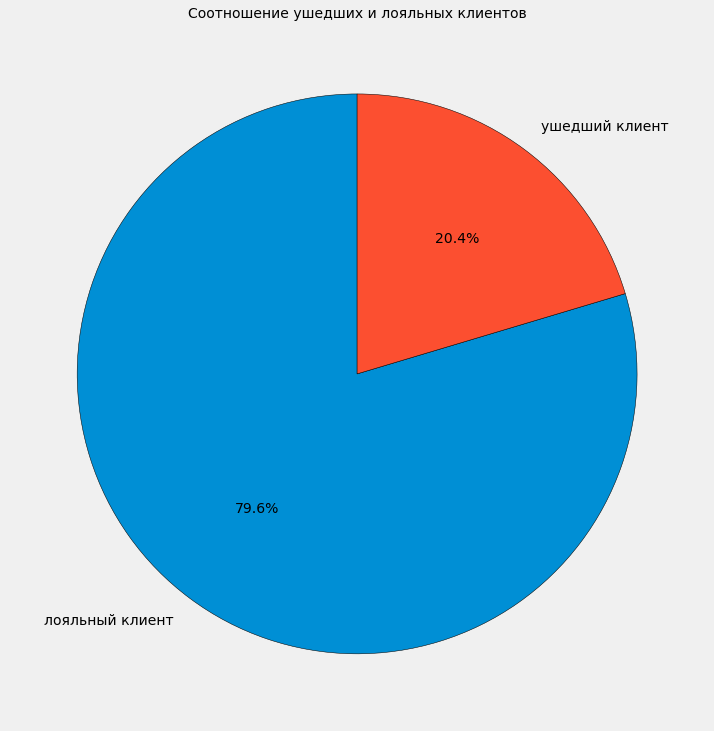

In [46]:
count_clients_df = churn_data[['Exited']]
count_clients_df['status'] = churn_data['Exited'].apply(lambda x: 'ушедший клиент' if x == 1 else 'лояльный клиент')
count_clients_df = pd.DataFrame(count_clients_df.groupby('status')['Exited'].count())

plt.style.use('fivethirtyeight')
f, ax = plt.subplots(figsize=(12, 12))
plt.pie(
    count_clients_df['Exited'],
    labels=count_clients_df.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops= {'edgecolor': 'black'}
)
plt.title('Cоотношение ушедших и лояльных клиентов', fontsize=14)

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

Locator attempting to generate 5439 ticks ([-8600.0, ..., 263300.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 5439 ticks ([-8600.0, ..., 263300.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 27186 ticks ([-8590.0, ..., 263260.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 5439 ticks ([-8600.0, ..., 263300.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 5439 ticks ([-8600.0, ..., 263300.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 27186 ticks ([-8590.0, ..., 263260.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 5439 ticks ([-8600.0, ..., 263300.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 5439 ticks ([-8600.0, ..., 263300.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 27186 ticks ([-8590.0, ..., 263260.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempti

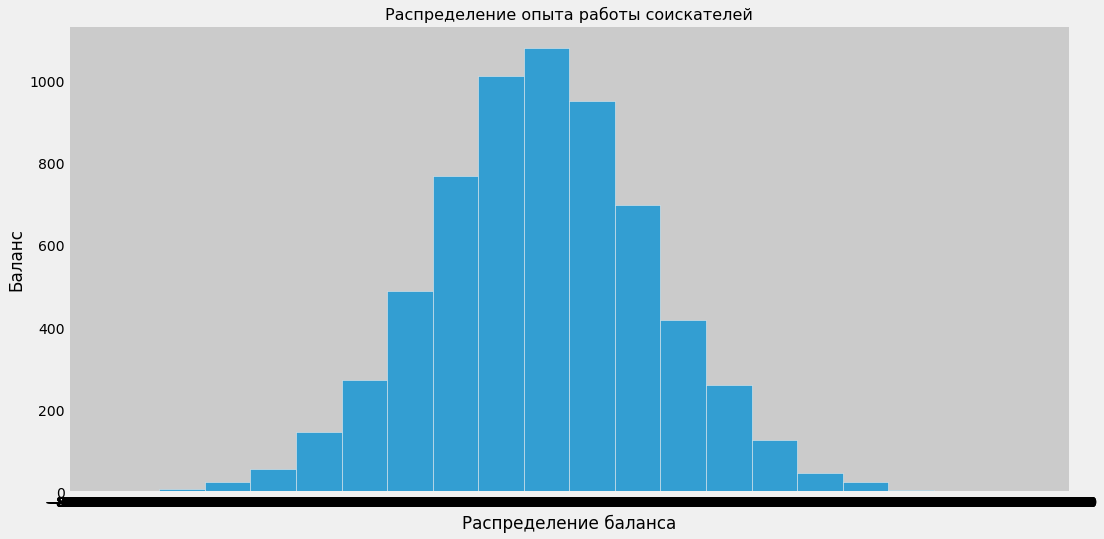

In [54]:
balance_data = churn_data[churn_data['Balance'] > 2500]

fig, axes = plt.subplots(figsize=(16, 8))
plt.subplots_adjust(hspace=.0)

histplot = sns.histplot(
    data=balance_data,
    x='Balance',
    bins=20,
)
histplot.set_title('Распределение опыта работы соискателей', fontsize=16)
histplot.set_xlabel('Распределение баланса')
histplot.set_ylabel('Баланс')

histplot.xaxis.set_major_locator(ticker.MultipleLocator(50))
histplot.xaxis.set_minor_locator(ticker.MultipleLocator(10))

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

Подсказка
Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited (так как 1 — это ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [ ]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.